#**Flight Project**
###**Lyana Murad**

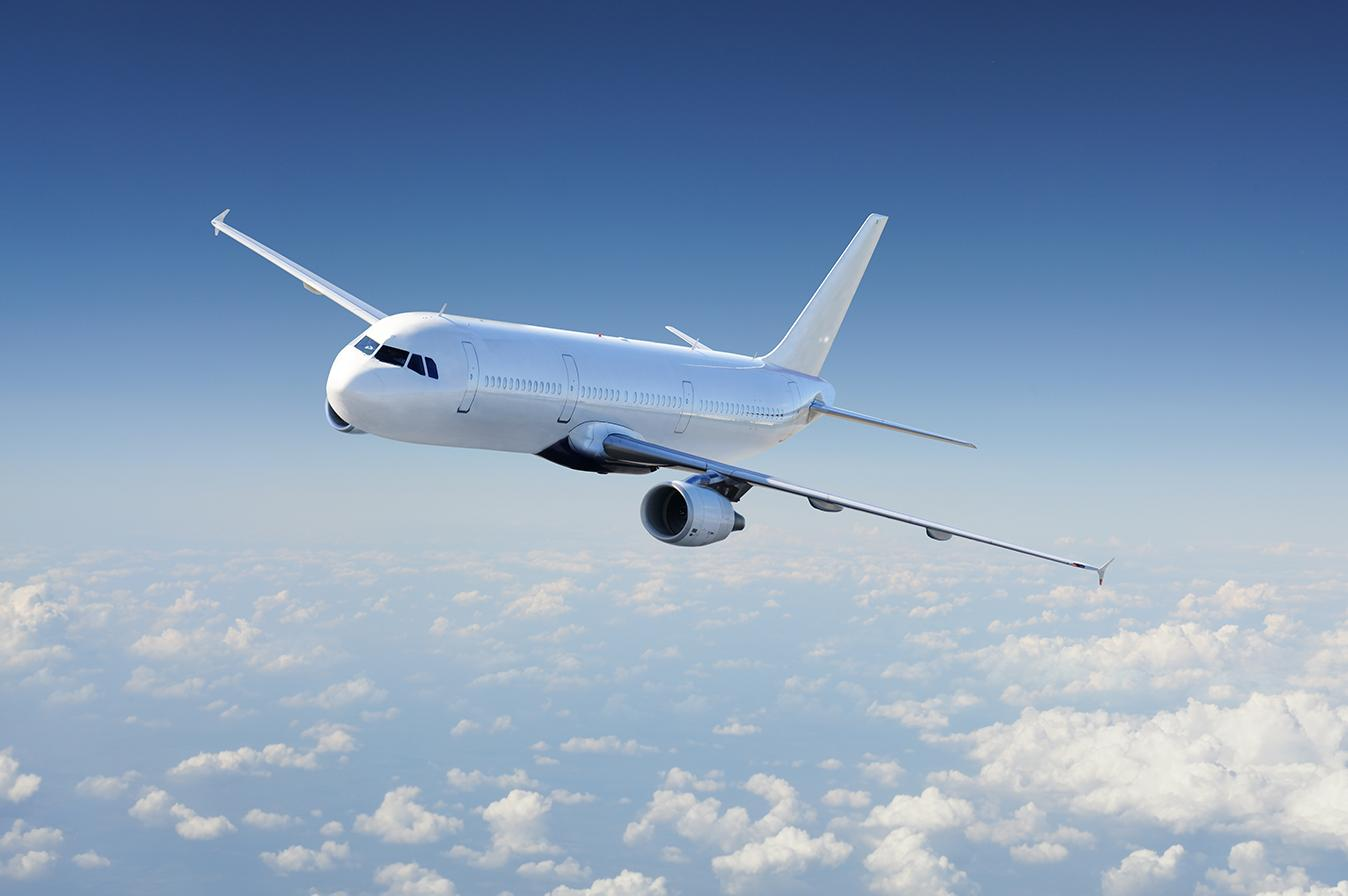

### **Import Libraries**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
#preprocessing
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
#models
#machine learning(Alogrthem)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### **Read_ CSV(Data)**

In [61]:
df=pd.read_csv('/content/flights ( Project 1 Structured Dataset ).csv')
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#**Dublicated Data**

In [62]:
df.duplicated().sum()

0

#**Visualize Correlation Heatmap**

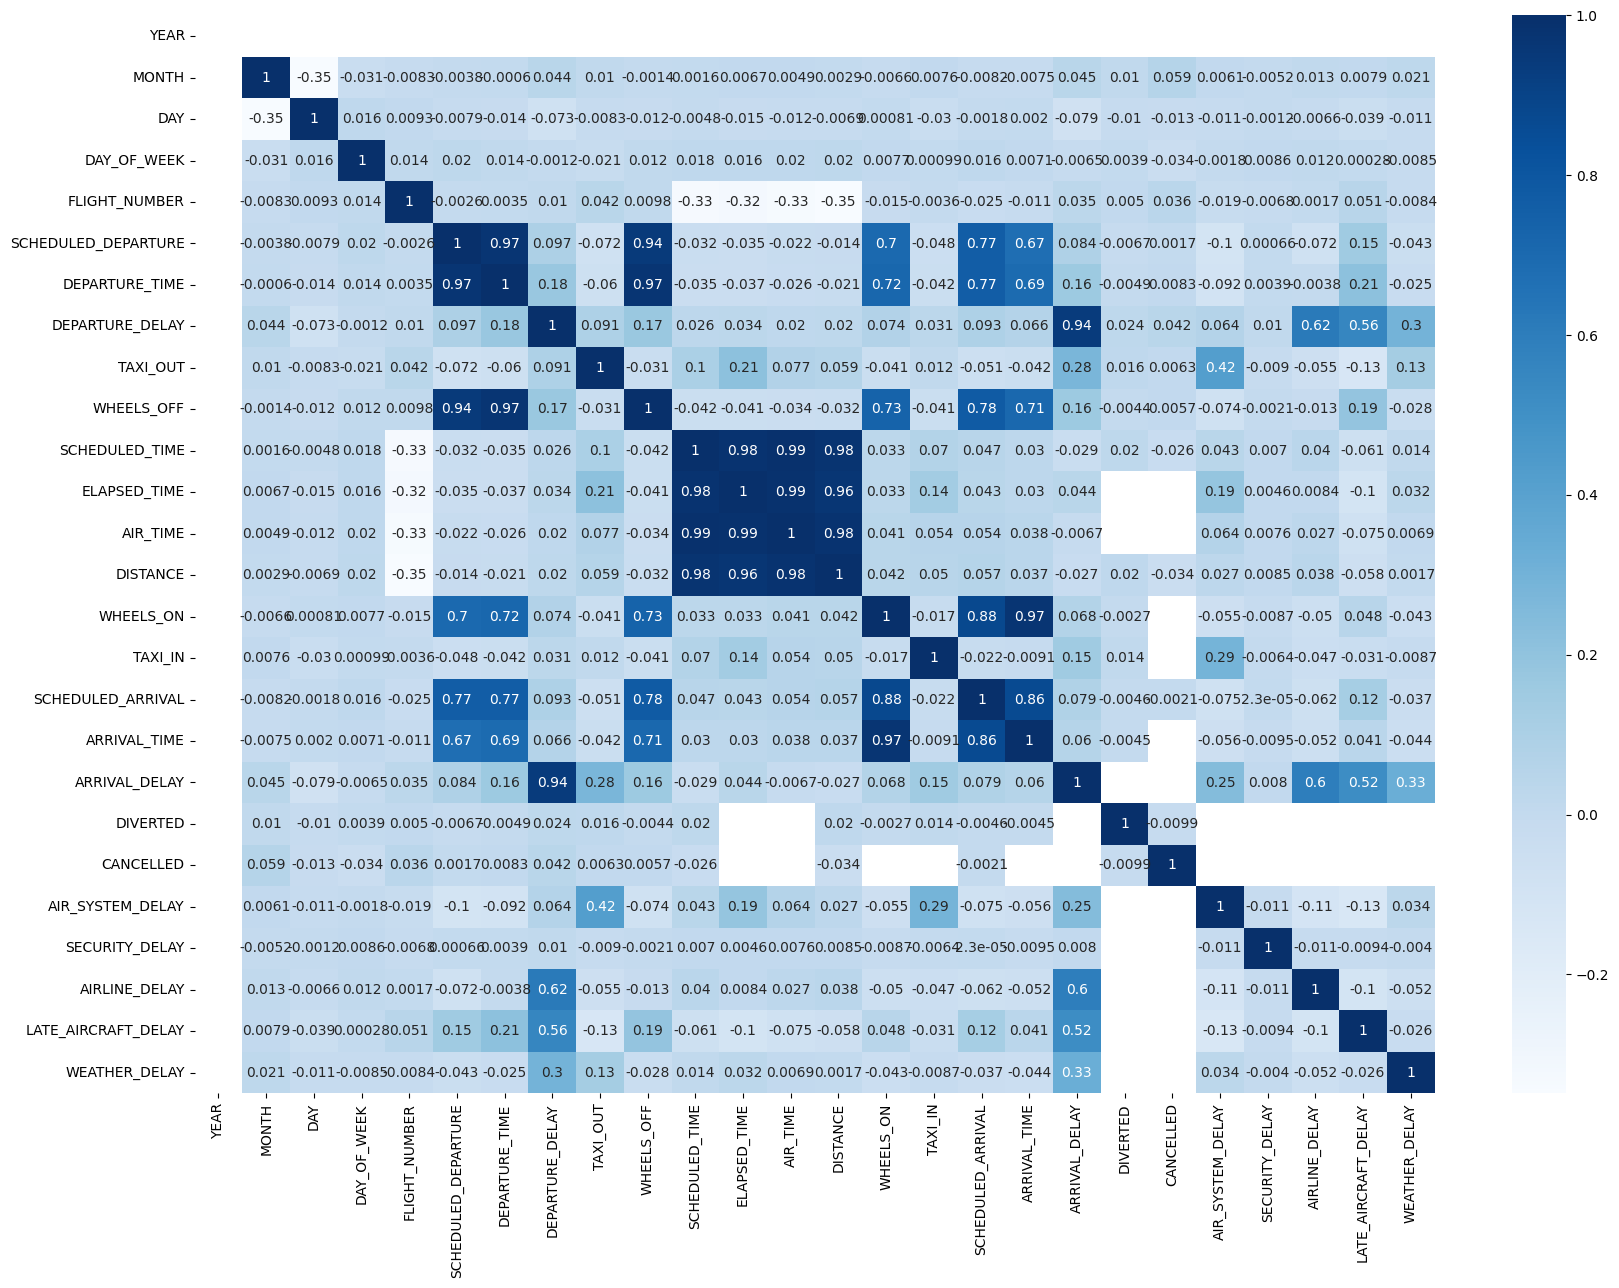

In [63]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap='Blues') # Changed color to cmap
plt.show()

### **Handling missing Value**

In [64]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,7750
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [65]:
df['TAIL_NUMBER'].fillna('UNKNOWN_TAIL_NUMBER', inplace=True)

<ipython-input-65-e9bea473d108>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TAIL_NUMBER'].fillna('UNKNOWN_TAIL_NUMBER', inplace=True)


In [66]:
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna('UNKNOWN')

In [67]:
df['DEPARTURE_TIME'].fillna(df['SCHEDULED_DEPARTURE'], inplace=True)

<ipython-input-67-f028be1ed48b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DEPARTURE_TIME'].fillna(df['SCHEDULED_DEPARTURE'], inplace=True)


In [68]:
df['DEPARTURE_DELAY'] = df['DEPARTURE_TIME'] - df['SCHEDULED_DEPARTURE']

In [69]:
df['TAXI_OUT'] = df['TAXI_OUT'].fillna(df['WHEELS_OFF'] - df['DEPARTURE_TIME'])
df['WHEELS_OFF'] = df['WHEELS_OFF'].fillna(df['DEPARTURE_TIME'] + df['TAXI_OUT'])
df['WHEELS_OFF'] = df['WHEELS_OFF'].fillna(df['WHEELS_OFF'].median())
df['TAXI_OUT'] = df['TAXI_OUT'].fillna(df['TAXI_OUT'].median())


In [70]:
df['SCHEDULED_TIME'] = df['SCHEDULED_TIME'].fillna(df['SCHEDULED_ARRIVAL'] - df['SCHEDULED_DEPARTURE'])

In [71]:
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].fillna(df['ARRIVAL_TIME'].median())
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].fillna(df['ELAPSED_TIME'].median())
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].fillna(df['SCHEDULED_DEPARTURE'] + df['ELAPSED_TIME'])
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].fillna(df['ARRIVAL_TIME'] - df['DEPARTURE_TIME'])

In [72]:
df['AIR_TIME'] = df['AIR_TIME'].fillna(df['ELAPSED_TIME'] - df['TAXI_OUT'] - (df['WHEELS_OFF'] - df['DEPARTURE_TIME']))

In [73]:
df['WHEELS_ON'] = df['WHEELS_ON'].fillna(df['WHEELS_OFF'] + df['ELAPSED_TIME'])

In [74]:
df['TAXI_IN'] = df['TAXI_IN'].fillna(df['ELAPSED_TIME'] - df['AIR_TIME'] - df['TAXI_OUT'])

In [75]:
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].fillna(df['ARRIVAL_TIME'] - df['SCHEDULED_ARRIVAL'])

In [76]:
df['AIR_SYSTEM_DELAY'] = df['AIR_SYSTEM_DELAY'].fillna(df['DEPARTURE_DELAY'] + df['ARRIVAL_DELAY'])

In [77]:
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(df['DEPARTURE_DELAY'] - df['ARRIVAL_DELAY'])
df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].fillna(df['DEPARTURE_DELAY'] - df['TAXI_OUT'])
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(df['AIR_TIME'] - df['ELAPSED_TIME'])
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(df['ARRIVAL_DELAY'] - df['AIR_TIME'])


In [78]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


### **Data Information**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1048575 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1048575 non-null  float64
 11  DEPARTURE_DELAY      1048575 non-null  float64
 12  TAXI_OUT             1048575 non-null  float64
 13  WHEELS_OFF           1048575 non-null  float64
 14  SCHEDULED_TIME       1048575 non-null  float64
 15

### **Data Describe**

In [80]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2015.0,1.694297e+00,1.382097e+01,3.953196e+00,2.256759e+03,1.322632e+03,1.333376e+03,1.074436e+01,1.655199e+01,1.356791e+03,...,1.504820e+03,1.493338e+03,8.129695e+00,2.426150e-03,3.864960e-02,-5.118190e+00,1.115107e+00,-1.127917e+01,-1.261571e+01,-9.036615e+01
std,0.0,7.051508e-01,8.725656e+00,1.999436e+00,1.799166e+03,4.707748e+02,4.829714e+02,1.171049e+02,9.888149e+00,4.736878e+02,...,4.865613e+02,4.970545e+02,1.135150e+02,4.919620e-02,1.927585e-01,1.181077e+02,1.165407e+02,5.563723e+01,1.001912e+02,2.064418e+02
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.358000e+03,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-2.308000e+03,0.000000e+00,0.000000e+00,-3.771000e+03,-3.527000e+03,-2.401000e+03,-1.351000e+03,-4.104000e+03
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.550000e+02,9.200000e+02,9.270000e+02,-5.000000e+00,1.100000e+01,9.540000e+02,...,1.120000e+03,1.125000e+03,-1.200000e+01,0.000000e+00,0.000000e+00,-1.900000e+01,-1.000000e+00,-2.100000e+01,-2.400000e+01,-1.380000e+02
50%,2015.0,2.000000e+00,1.300000e+01,4.000000e+00,1.725000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.400000e+01,1.342000e+03,...,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+00,1.000000e+00,-1.400000e+01,-1.800000e+01,-7.900000e+01
75%,2015.0,2.000000e+00,2.100000e+01,6.000000e+00,3.485000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.900000e+01,1.736000e+03,...,1.915000e+03,1.907000e+03,1.300000e+01,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+01,0.000000e+00,-1.100000e+01,-2.600000e+01
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,2.395000e+03,2.250000e+02,2.400000e+03,...,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,2.980000e+03,2.418000e+03,2.388000e+03,2.338000e+03,2.300000e+03


## **Preprossing**

### **Boxplot Visualization of Flight Delay**

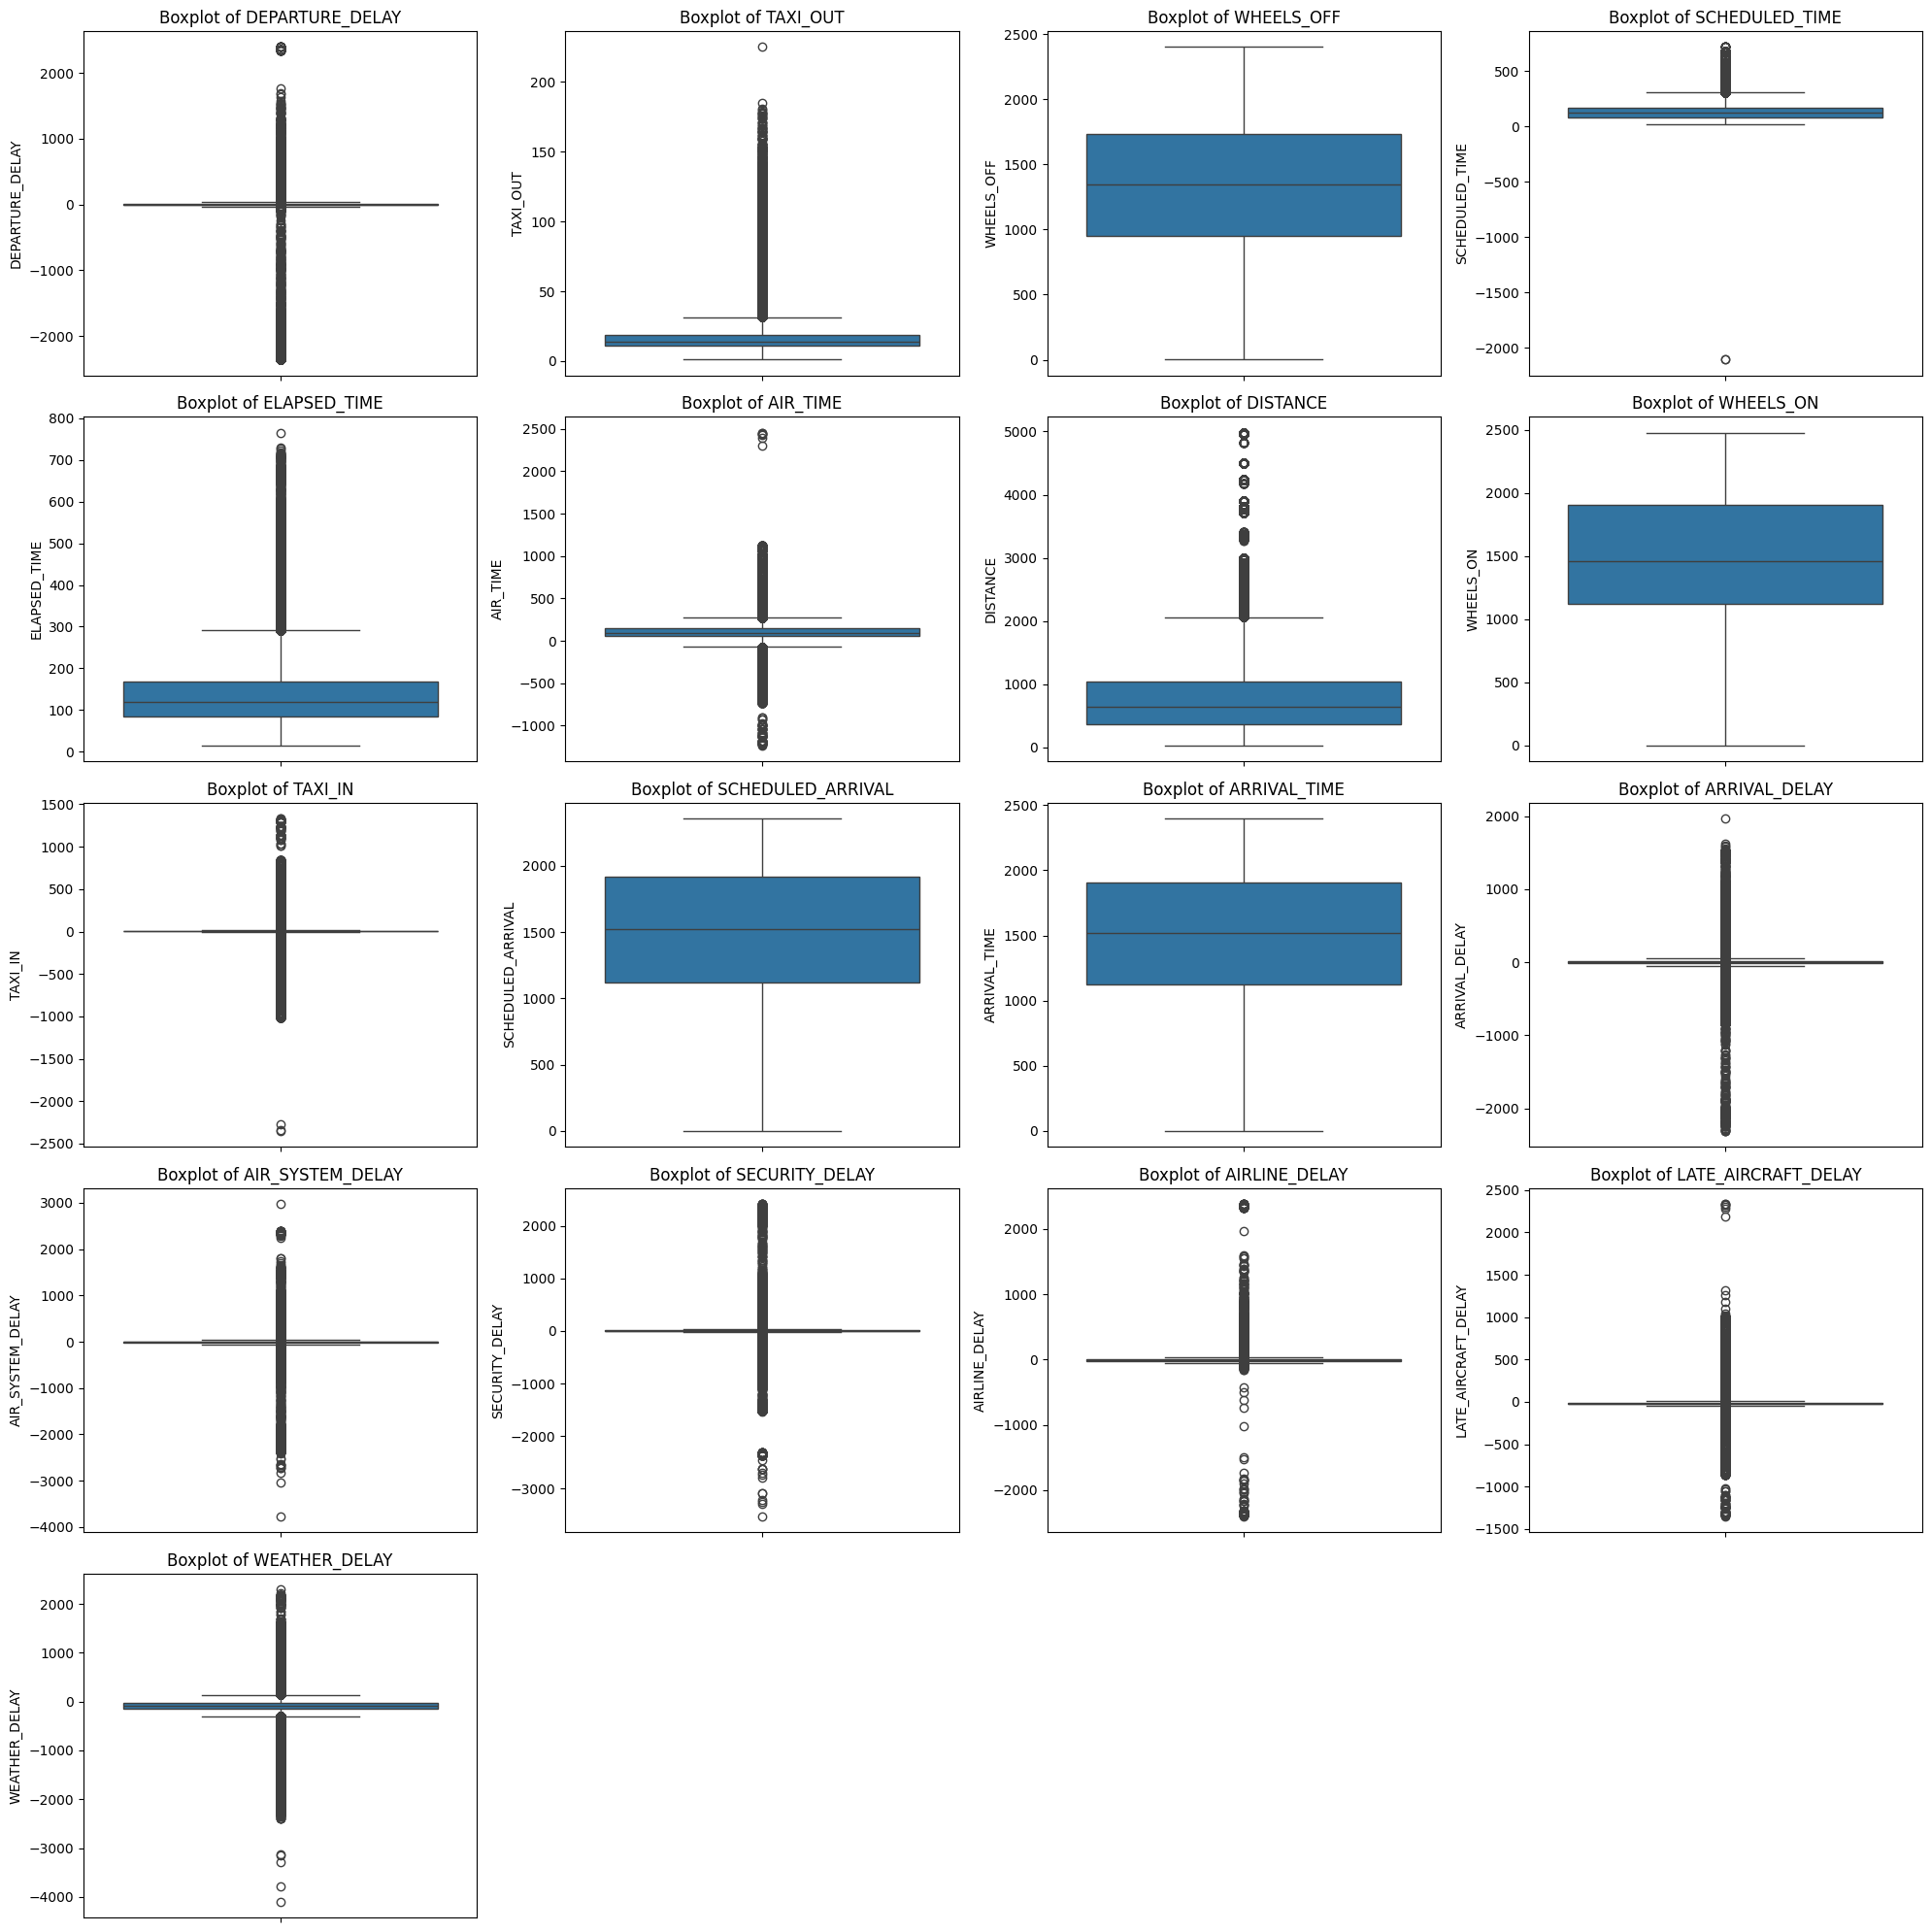

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
    'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
    'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'
]

# Define the number of columns for the grid layout
num_cols = 4
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, num_rows * 4))  # Adjust the figure size as needed

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

### **Handling Outliers with Square Root**

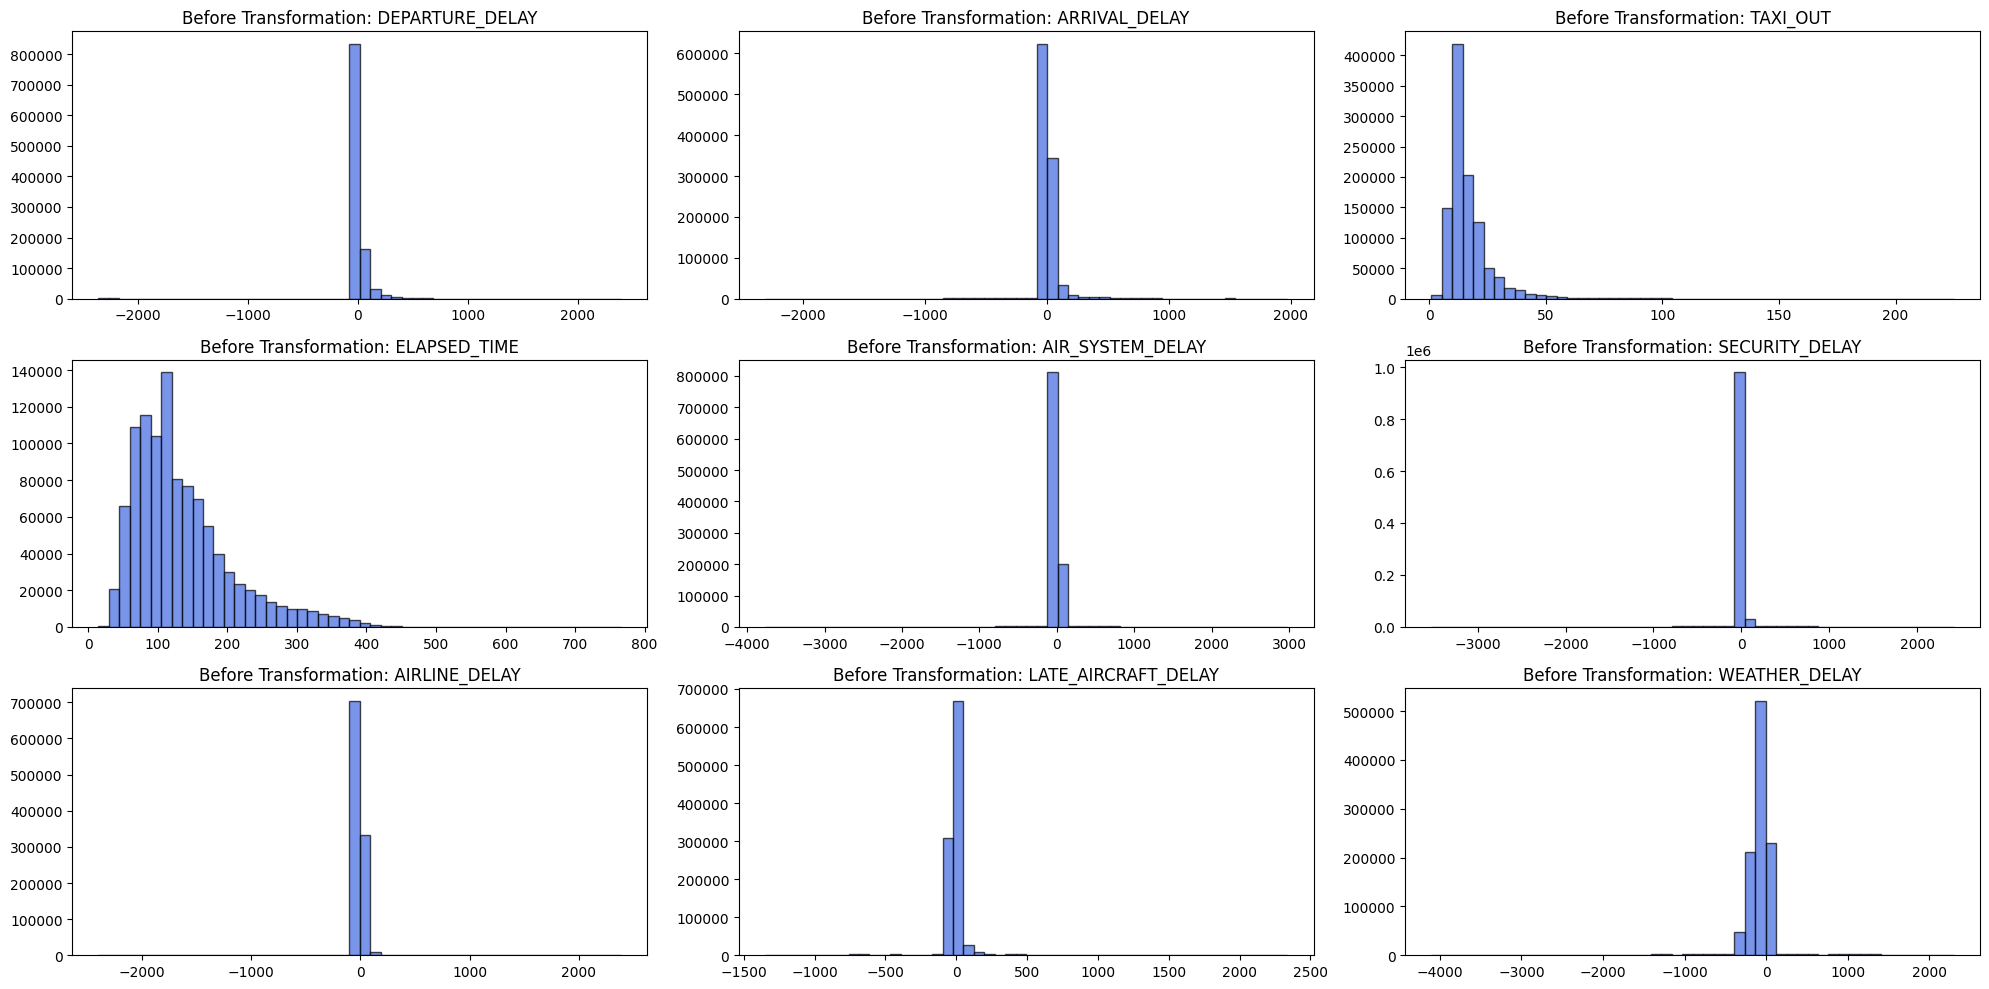

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the specified columns

# List of columns to apply cube root transformation
columns_to_transform = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'ELAPSED_TIME',
                        'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# Plot histograms before cube root transformation
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column].dropna(), bins=50, color='royalblue', alpha=0.7, edgecolor='black')  # Added edgecolor
    plt.title(f'Before Transformation: {column}')
    plt.tight_layout()

plt.show()

In [83]:
df_sqrt = df.copy()  # Create a copy to keep the original data intact
for column in columns_to_transform:
    df_sqrt[column] = np.sqrt(df[column])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


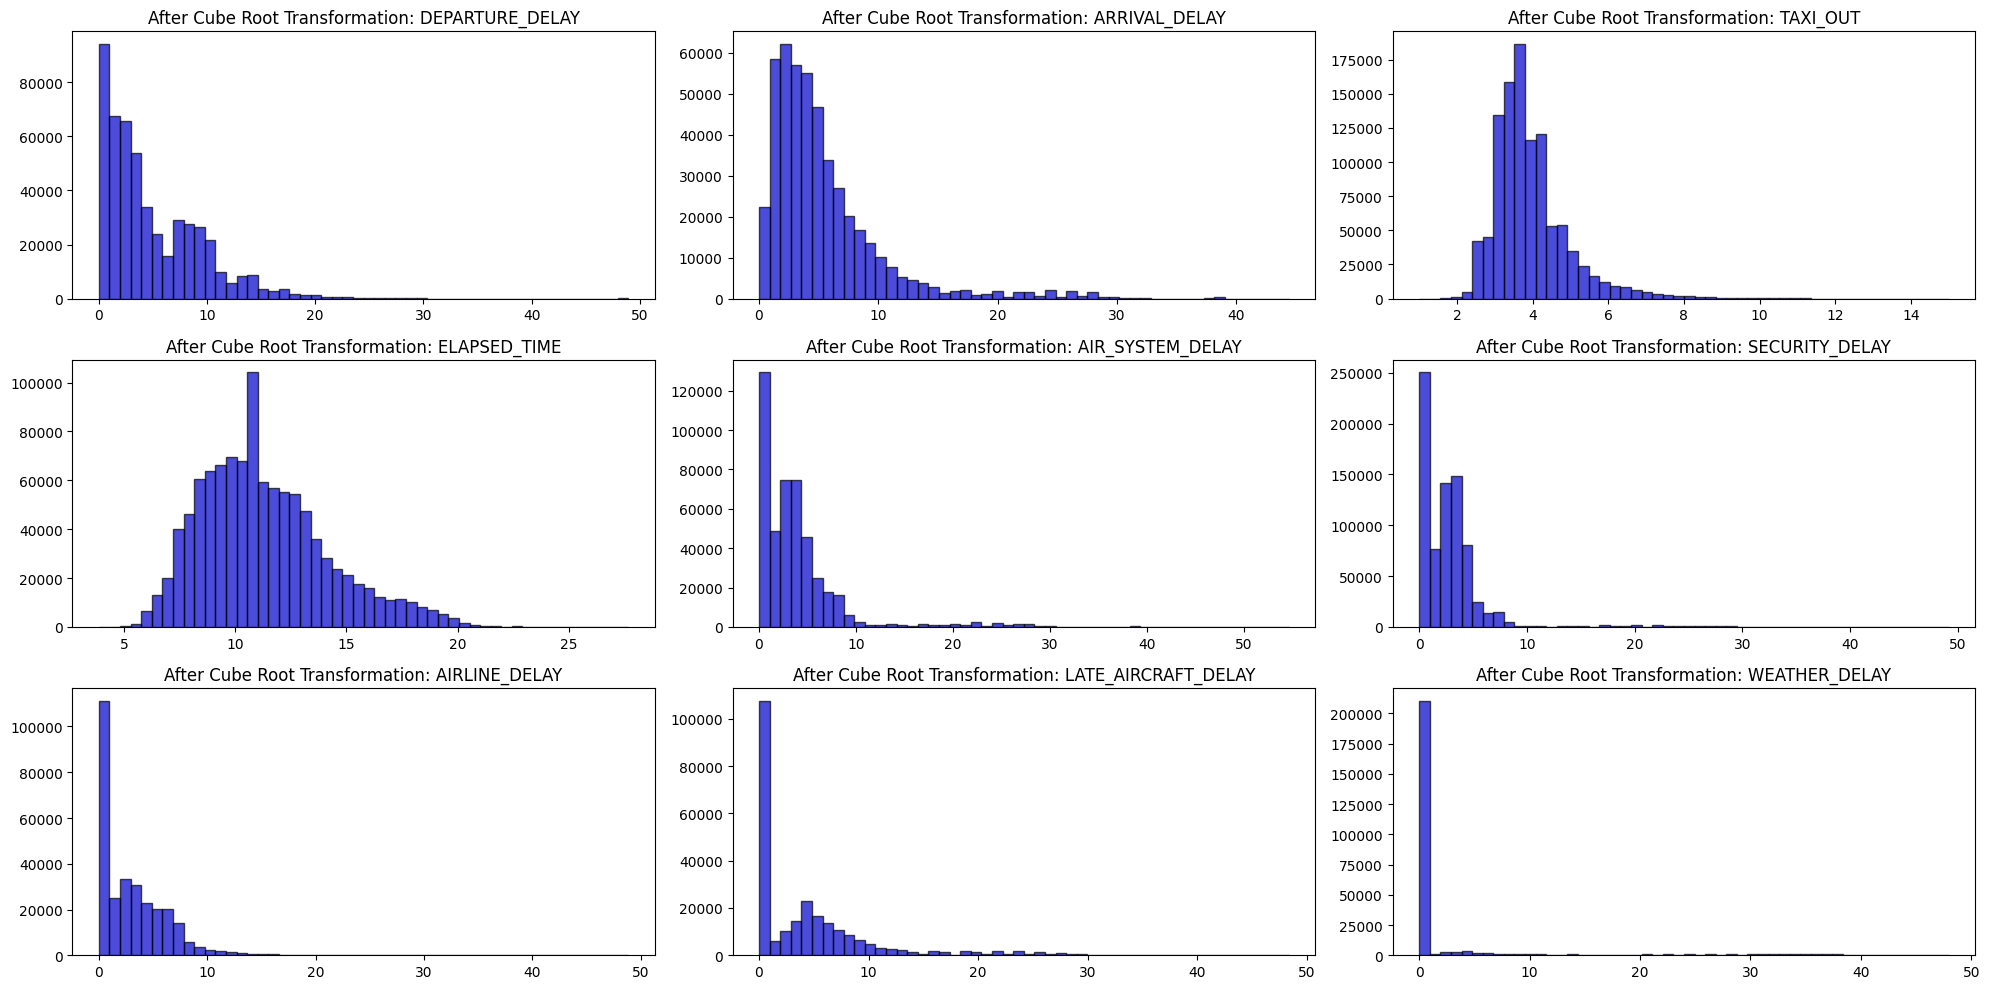

In [84]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_sqrt[column].dropna(), bins=50, color='mediumblue', alpha=0.7, edgecolor='black')  # Added edgecolor
    plt.title(f'After Cube Root Transformation: {column}')
    plt.tight_layout()

plt.show()

### **Dropping Non-Essential Columns from the Dataset**

In [85]:
df = df.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'TAIL_NUMBER', 'YEAR'], axis=1, errors='ignore')

### **Classifying Flight Delay Types Based on Delay Reasons**

In [86]:
def classify_delay(row):
    if row['SECURITY_DELAY'] > 0:
        return 'Security Delay'
    elif row['AIRLINE_DELAY'] > 0:
        return 'Airline Delay'
    elif row['LATE_AIRCRAFT_DELAY'] > 0:
        return 'Late Aircraft Delay'
    elif row['WEATHER_DELAY'] > 0:
        return 'Weather Delay'
    else:
        return 'No Delay'


df['Delay_reason_type'] = df.apply(classify_delay, axis=1)


print(df[['SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Delay_reason_type']].head())


   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
0          2371.0         2328.0                -25.0         -191.0   
1             1.0          -20.0                -16.0         -272.0   
2            -7.0          -18.0                -27.0         -261.0   
3             4.0          -20.0                -23.0         -267.0   
4            20.0          -12.0                -16.0         -220.0   

  Delay_reason_type  
0    Security Delay  
1    Security Delay  
2          No Delay  
3    Security Delay  
4    Security Delay  


In [87]:
df['Delay_reason_type'].value_counts().to_frame().style.background_gradient(cmap='Blues')

,count
Delay_reason_type,
Security Delay,526250
No Delay,311890
Airline Delay,123791
Late Aircraft Delay,58076
Weather Delay,28568


### **Encoding Cancellation Reason Using LabelEncoder**

In [88]:
lableencoder = LabelEncoder()
df['CANCELLATION_REASON'] = lableencoder.fit_transform(df['CANCELLATION_REASON'])

### **Separating Features and Target Variable for DelayClassification**

In [89]:
X = df.drop(columns=['SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Delay_reason_type']).values
y = df['Delay_reason_type'].values


### **Correlation Heatmap of Features and Target Variable**

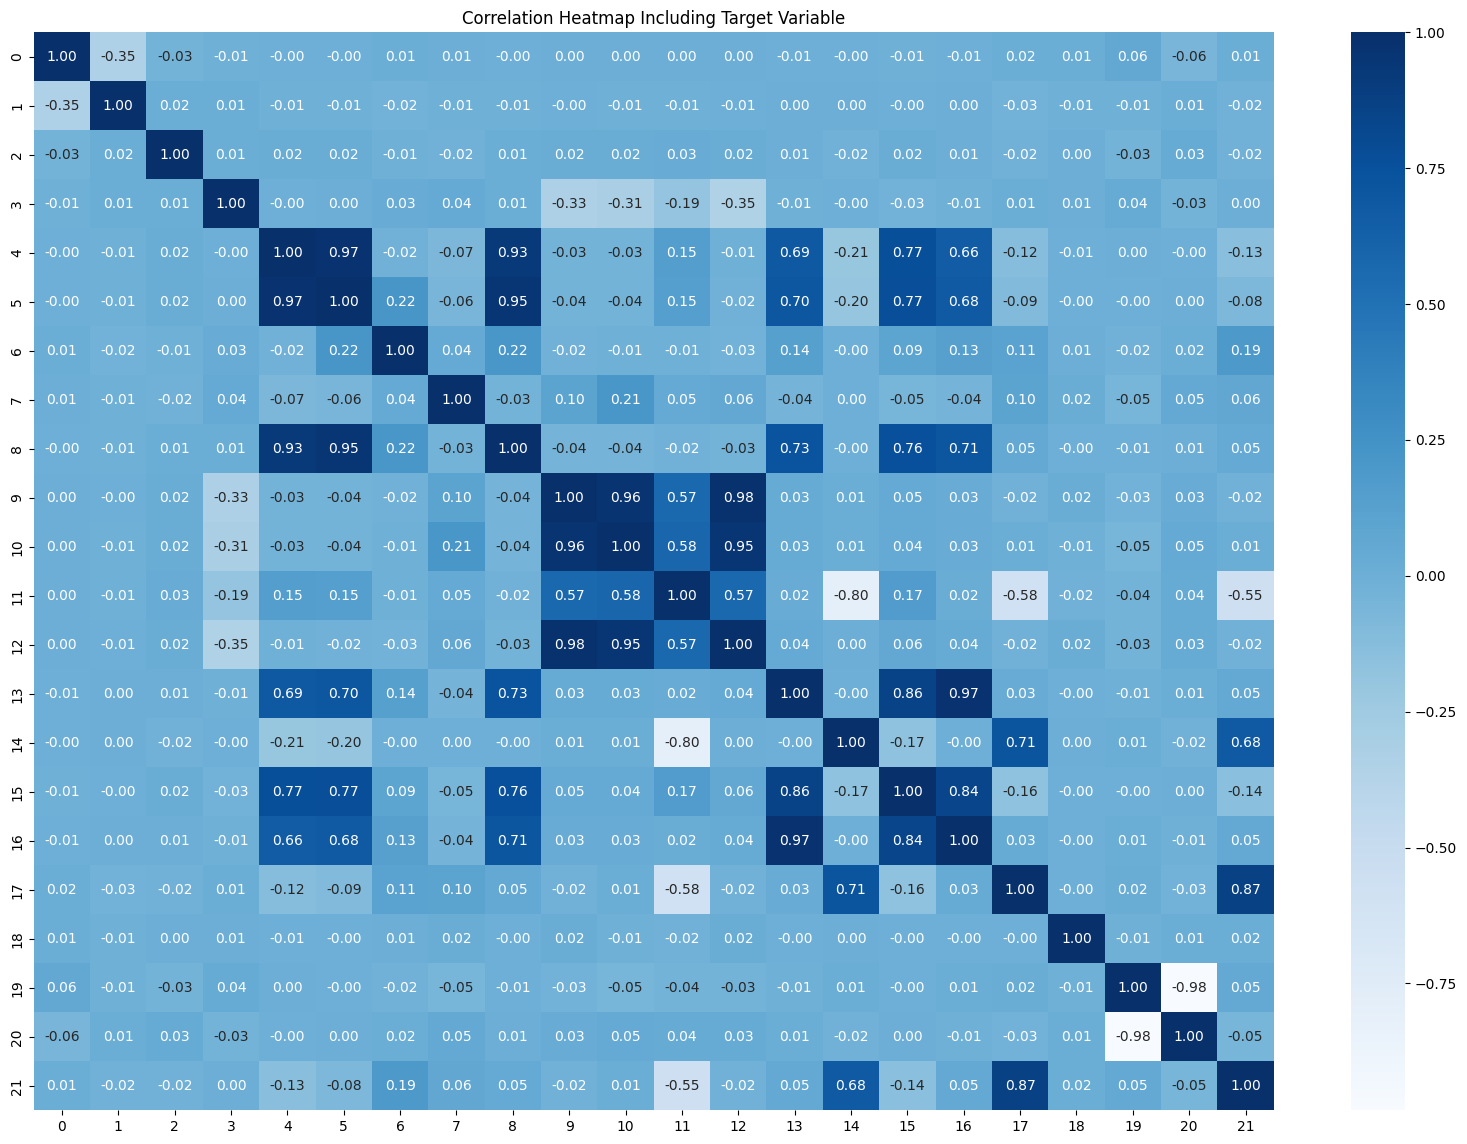

In [90]:
df_combined = pd.DataFrame(X)
# Now you can add y as a new column
df_combined['Target'] = y

# Compute the correlation matrix
correlation_matrix = df_combined.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap Including Target Variable')
plt.show()

### **Handling Imbalanced Data with Random Undersampling**

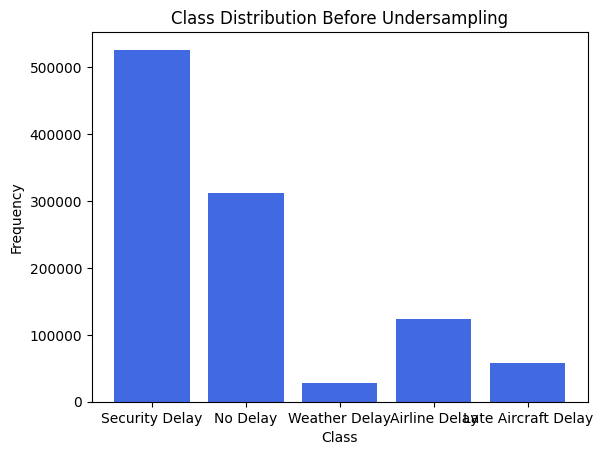

In [91]:
from collections import Counter

def plot_class_distribution(y, title):
    counter = Counter(y)
    # Use a valid color name or hex code
    plt.bar(counter.keys(), counter.values(), color='royalblue')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(range(len(counter)), counter.keys())
    plt.show()

plot_class_distribution(y , "Class Distribution Before Undersampling")

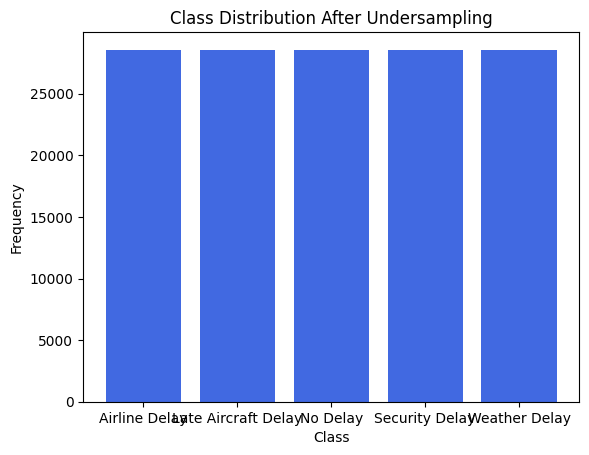

In [92]:

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
y_resampled = y_resampled.ravel()
plot_class_distribution(y_resampled, "Class Distribution After Undersampling")

In [93]:
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled, columns=['Target'])

# Check unique classes in y_resampled
print("Unique classes in y_resampled:", y_resampled['Target'].unique())


Unique classes in y_resampled: ['Airline Delay' 'Late Aircraft Delay' 'No Delay' 'Security Delay'
 'Weather Delay']


### **One-Hot Encoding of Resampled Target Variable**

In [94]:
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_resampled_encoded = onehot_encoder.fit_transform(y_resampled)


### **Splitting Resampled Data into Training and Testing Sets**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

In [96]:
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (114272, 22)
X_test shape: (28568, 22)
y_train shape: (114272, 5)
y_test shape: (28568, 5)


### **Standardizing Features Using StandardScaler**

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Deep Learning(Build ANN)**

### **1.Building a Sequential Neural Network Model**

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(5, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **3.Compiling the Model with SGD Optimizer and Categorical Cross-Entropy Loss**

In [99]:
model.compile(optimizer ='Adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

### **3.Configuring Early Stopping to Prevent Overfitting**

In [100]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

### **4.Training the Model with Epochs, Batch Size, and Validation Split**

In [101]:
history=model.fit(X_train, y_train, epochs=20,batch_size=300,
                  validation_split=0.2, callbacks=[])

Epoch 1/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3248 - loss: 1.4691 - val_accuracy: 0.4667 - val_loss: 1.2229
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5104 - loss: 1.1233 - val_accuracy: 0.6111 - val_loss: 0.8473
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6195 - loss: 0.8305 - val_accuracy: 0.6837 - val_loss: 0.7358
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6959 - loss: 0.7084 - val_accuracy: 0.7189 - val_loss: 0.6278
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7228 - loss: 0.6232 - val_accuracy: 0.7243 - val_loss: 0.5858
Epoch 6/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5906 - val_accuracy: 0.7268 - val_loss: 0.5654
Epoch 7/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7325 - loss: 0.5633 - val_accuracy: 0.7355 - val_loss: 0.5485
Epoch 8/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7417 - loss: 0.5464 - val_accuracy: 0.

### **Plotting Model Accuracy Over Epochs**

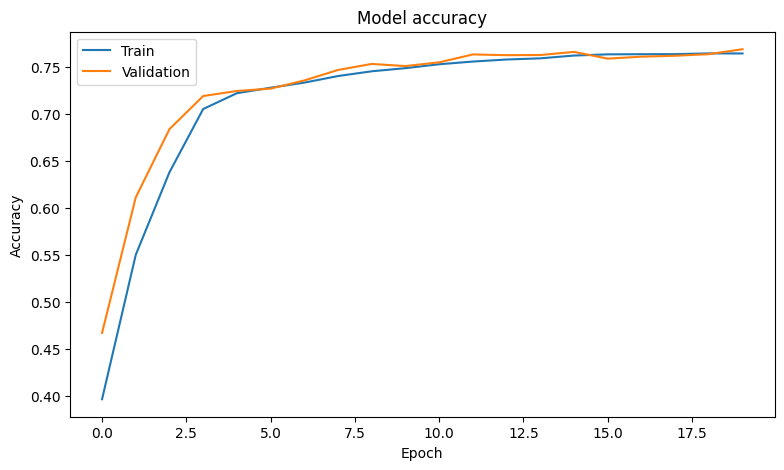

In [102]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [103]:
from sklearn.neural_network import MLPClassifier
import joblib


mlp = MLPClassifier()
mlp.fit(X_train, y_train)


joblib.dump(mlp, 'mlp_model.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['mlp_model.pkl']

## **Machine Learning**

 ### **LogisticRegression**

In [105]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)


logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **KNeighborsClassifier**

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred))


K-Nearest Neighbors Accuracy: 0.7513301596191543


### **RandomForestClassifier**

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8020162419490339


### **DecisionTreeClassifier**

In [109]:
from sklearn.tree import DecisionTreeClassifier
decisiontreeclassifier= DecisionTreeClassifier(random_state=42)
decisiontreeclassifier.fit(X_train, y_train)
y_pred_dt = decisiontreeclassifier.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7559507140856903


### **SVC**

In [111]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\nSVC Accuracy:", accuracy_score(y_test, y_pred_svc))


SVC Accuracy: 0.754095491458975
